# <center> Segmentez des clients d'un site e-commerce EXPLORATION

# 1. Introduction

Nous souhaitons proposer un modèle de segmentation afin de comprendre les différents types de clients selon leurs comportement d'achat pour l'entreprise Olist

## 1.1 Les librairies python utilisées dans notre programme

In [3]:
import sys

sys.getdefaultencoding()  # Vérifier le type de codage

'utf-8'

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
pip install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [3 lines of output]
  error in nb_black setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after name and no valid version specifier)
      yapf >= '0.28'; python_version < '3.6'
           ^
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox

from sklearn.impute import KNNImputer


import dtale as dt  # Meilleur visualisation du data

import folium
import folium.plugins

<IPython.core.display.Javascript object>

In [8]:
import matplotlib  # Vérifier la version de matplotlib

print("matplotlib: {}".format(matplotlib.__version__))
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.7.1
numpy: 1.24.3
pandas: 1.5.3
seaborn: 0.12.2


<IPython.core.display.Javascript object>

## 1.2 Les fichiers utilisés 

In [10]:
# Affecter une variable avec le chemin vers le dossier
path = "C:/Users/maimo/Documents/projet 4/"
os.listdir(path)  # methode affichant tous les fichiers contenus dans notre dossier

['.ipynb_checkpoints',
 'BACAR_Maïmouna_1_notebook_exploratoire_062023.ipynb',
 "BACAR_Maïmouna_2_notebook d'essais-062023.ipynb",
 'BACAR_Maïmouna_2_notebook_simulation-062023-Copy1.ipynb',
 'BACAR_Maïmouna_2_notebook_simulation-062023.ipynb',
 'Bacar_Maïmouna_4_presentation_062023.pdf',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

<IPython.core.display.Javascript object>

# 2. L'exploration des fichiers

## 2.1 Clients

Le premier fichier csv est un jeu de données sur les clients

In [11]:
customers = pd.read_csv(path + "olist_customers_dataset.csv")  # client
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<IPython.core.display.Javascript object>

Lorsque l'on ouvre le fichier on découvre des informations sur le numéro dd'identification du client, mais aussi des information sur l'Etat et la ville du client. 

In [12]:
print(f"shape : {customers.shape}")
print(f"le nombre de lignes est : {customers.shape[0]}")
print(f"le nombre de colonnes est : {customers.shape[1]}")

shape : (99441, 5)
le nombre de lignes est : 99441
le nombre de colonnes est : 5


<IPython.core.display.Javascript object>

In [13]:
customers.info()  # Affiche le nombre de valeur non nulle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


<IPython.core.display.Javascript object>

il n'y a aucune valeur nulle

## 2.2 La géocalisation

Ce second fichier possède des données sur la géocalisation de la clientèle

In [14]:
geolocation = pd.read_csv(path + "olist_geolocation_dataset.csv")  # géolocalisation
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<IPython.core.display.Javascript object>

Nous avons des informations sur la longitude, la latitude, la ville  et l'Etat 

In [15]:
print(f"shape : {geolocation.shape}")
print(f"le nombre de lignes est : {geolocation.shape[0]}")
print(f"le nombre de colonnes est : {geolocation.shape[1]}")

shape : (1000163, 5)
le nombre de lignes est : 1000163
le nombre de colonnes est : 5


<IPython.core.display.Javascript object>

In [16]:
geolocation.nunique()  # le nombre de valeur unique par colonne

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

<IPython.core.display.Javascript object>

Nous pouvons ainsi remarquer qu'il y a 8011 villes situées dans 27 Etats différents

In [17]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


<IPython.core.display.Javascript object>

Nous avons aucune valeur manquante dans ce dataframe.

In [18]:
nbr_state = geolocation["geolocation_state"].value_counts()

<IPython.core.display.Javascript object>

Text(0.5, 0, '\n Nombre de client')

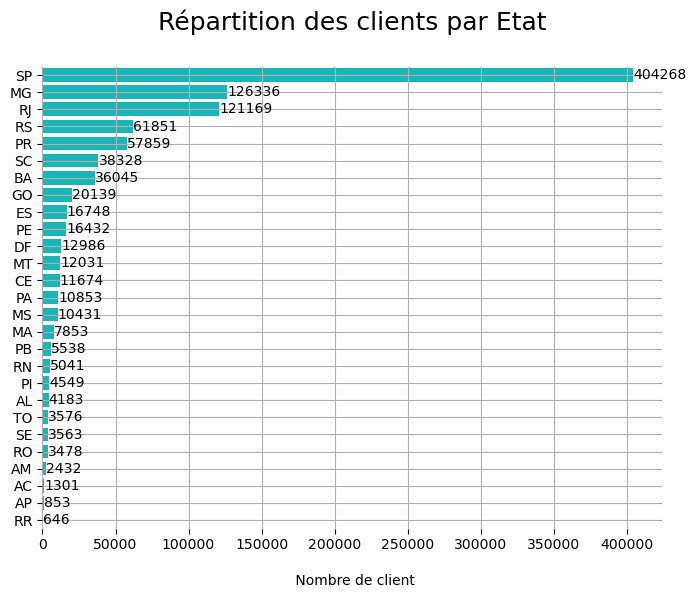

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(8, 6))
rev = sns.barplot(
    x=nbr_state.values, y=nbr_state.index, color="darkturquoise"
)  # Affiche le graphique en bar du nombre de pays par rapport aux revenus

for s in ["top", "bottom", "left", "right"]:
    rev.spines[s].set_visible(False)

rev.bar_label(rev.containers[0])  # affiche le nombre au bout de la bar du graphe

plt.grid()
plt.title("Répartition des clients par Etat\n ", fontsize=18)
plt.xlabel("\n Nombre de client")

## 2.3 Les commandes clients

Ce troisième data se base sur les commandes des clients

In [25]:
orders_dataset = pd.read_csv(path + "olist_orders_dataset.csv")
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<IPython.core.display.Javascript object>

**order_status =:** statut de la commande


**order_purchase_timestamp :** la date et l'heure de la commande


**order_approved_at	order_delivered_carrier_date**: commande approuvée à la date de livraison du transporteur


**order_delivered_customer_date**: la date de livraison


**order_estimated_delivery_date** : la date d'estimation de la livraison

In [26]:
print(f"shape : {orders_dataset.shape}")
print(f"le nombre de lignes est : {orders_dataset.shape[0]}")
print(f"le nombre de colonnes est : {orders_dataset.shape[1]}")

shape : (99441, 8)
le nombre de lignes est : 99441
le nombre de colonnes est : 8


<IPython.core.display.Javascript object>

In [27]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


<IPython.core.display.Javascript object>

In [34]:
# le pourcentage de valeur manquante de la colonne la moins remplie (order_delivered_customer_date)
A = (1 - 96476 / 99441) * 100
print(A)

2.981667521444875


<IPython.core.display.Javascript object>

Comparer au deux premiers dataframes; celui ci possède des valeurs manquants mais cela représente seulement moins de 3% de données manquantes par colonne

Il serait intéressent d'observer la répartion du nombre de commande dans la semaine et dans l'année. De surcroît nous allons réaliser un graphique

In [35]:
datetime_cols = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

<IPython.core.display.Javascript object>

In [36]:
for col in datetime_cols:
    orders_dataset[col] = orders_dataset[col].astype("datetime64[ns]")

<IPython.core.display.Javascript object>

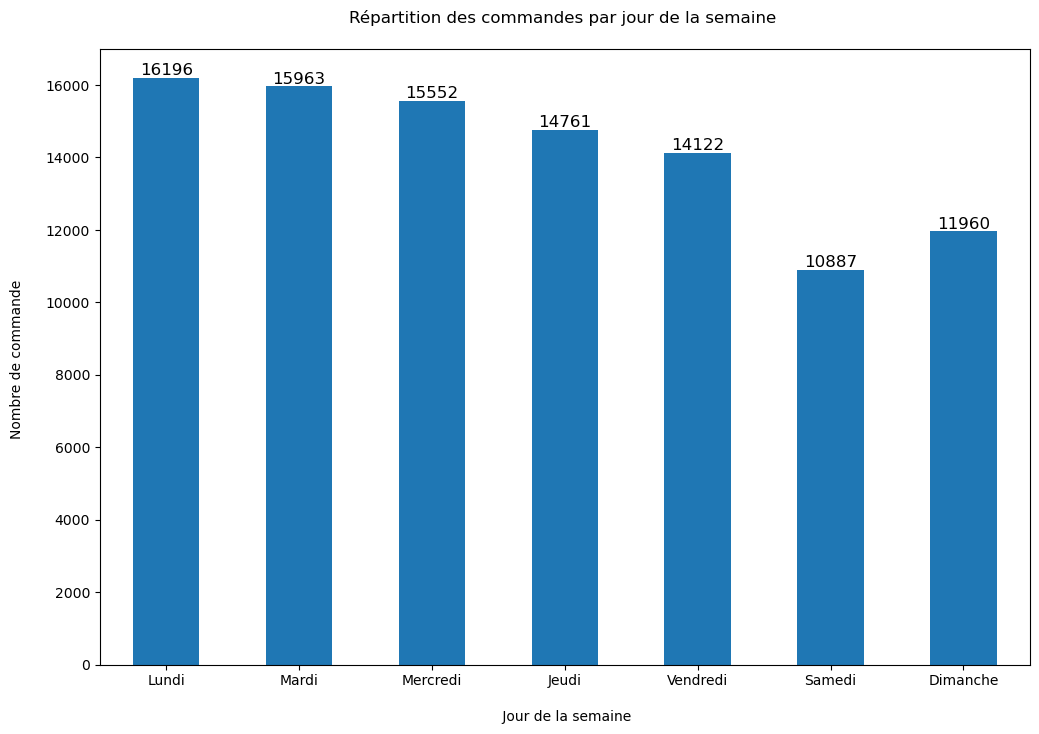

<IPython.core.display.Javascript object>

In [37]:
plt.figsize = (8, 4)
graphe = (
    orders_dataset.groupby(orders_dataset["order_purchase_timestamp"].dt.dayofweek)
    .agg({"order_id": "nunique"})
    .plot(
        figsize=(12, 8),
        kind="bar",
        title="Répartition des commandes par jour de la semaine \n",
        ylabel="Nombre de commande \n",
        xlabel="\n Jour de la semaine",
        legend=False,
    )
)


graphe.bar_label(
    graphe.containers[0], fontsize=12
)  # la valeur de l'ordonnée sur la bar

# grapheEntree.bar_label(grapheEntree.containers[0],fontsize=10,rotation=90)
plt.xticks(
    np.arange(0, 7),
    ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"],
    rotation="horizontal",
)
plt.show()

On constate que la majorité des clients passent leur commande en début de semaine. De plus le week_end sont les jours où le nombres de commandes sont faibles 

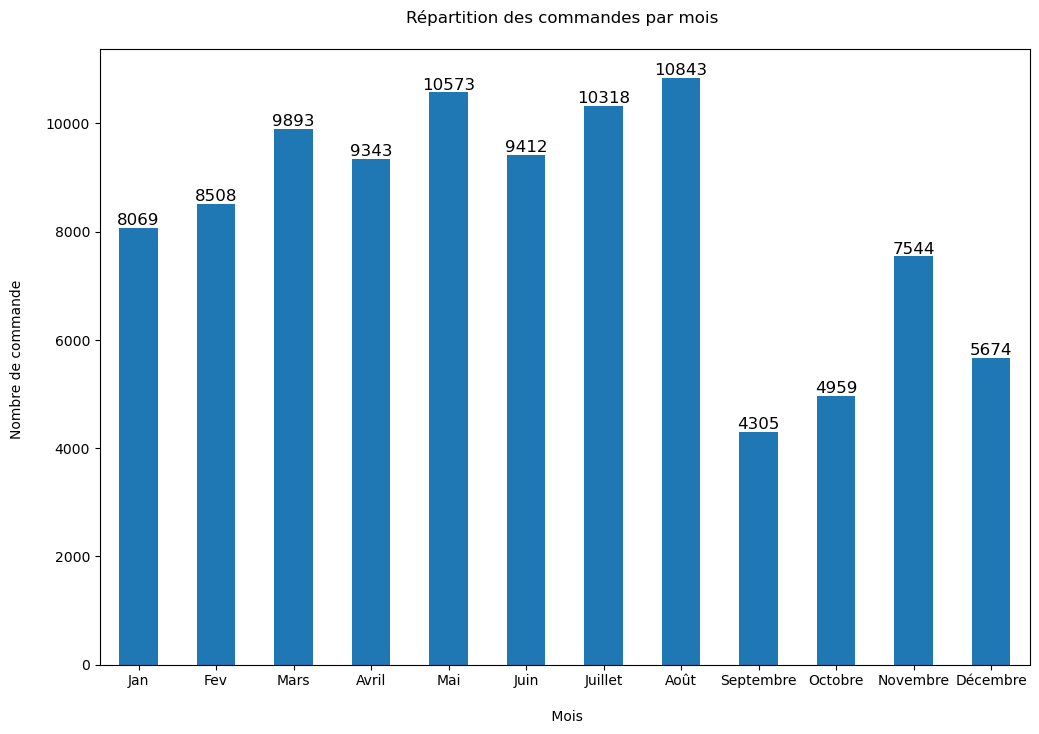

<IPython.core.display.Javascript object>

In [38]:
plt.figsize = (8, 4)
graphe = (
    orders_dataset.groupby(orders_dataset["order_purchase_timestamp"].dt.month)
    .agg({"order_id": "nunique"})
    .plot(
        figsize=(12, 8),
        kind="bar",
        title="Répartition des commandes par mois \n",
        ylabel="Nombre de commande \n",
        xlabel="\n Mois",
        legend=False,
    )
)


graphe.bar_label(
    graphe.containers[0], fontsize=12
)  # la valeur de l'ordonnée sur la bar

# grapheEntree.bar_label(grapheEntree.containers[0],fontsize=10,rotation=90)
plt.xticks(
    np.arange(0, 12),
    [
        "Jan",
        "Fev",
        "Mars",
        "Avril",
        "Mai",
        "Juin",
        "Juillet",
        "Août",
        "Septembre",
        "Octobre",
        "Novembre",
        "Décembre",
    ],
    rotation="horizontal",
)
plt.show()

On remarque qu'il y a plus commande entre mars et juillet. De plus, en automne est divisé presque de moitié. 

## 2.4 Les articles

In [39]:
order_items = pd.read_csv(path + "olist_order_items_dataset.csv")  # commande
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<IPython.core.display.Javascript object>

In [40]:
print(f"shape : {order_items.shape}")
print(f"le nombre de lignes est : {order_items.shape[0]}")
print(f"le nombre de colonnes est : {order_items.shape[1]}")

shape : (112650, 7)
le nombre de lignes est : 112650
le nombre de colonnes est : 7


<IPython.core.display.Javascript object>

**order_id :** identifiant de la commande

**order_item_id:** identifiant de l'article de la commande

**product_id :** identifiant du produit	

**seller_id :** identifiant du vendeur 

**shipping_limit_date :** date limite d'expédition

**price :** le prix	

**freight_value :** les frais de livraison

In [41]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


<IPython.core.display.Javascript object>

Il n'y a aucune valeur manquante dans ce dataframe

In [42]:
order_items.nunique()  # le nombre de valeur unique

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

<IPython.core.display.Javascript object>

Nous pouvons voir qu'il y a plus de 32951 produits différents

## 2.5 Moyen de paiement

Les différents moyens de paiements

In [43]:
payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<IPython.core.display.Javascript object>

In [44]:
print(f"shape : {payments.shape}")
print(f"le nombre de lignes est : {payments.shape[0]}")
print(f"le nombre de colonnes est : {payments.shape[1]}")

shape : (103886, 5)
le nombre de lignes est : 103886
le nombre de colonnes est : 5


<IPython.core.display.Javascript object>

**payment_sequential :** nombre de moyen de paiement utilisés
    
**payment_installments :** Nombre de versements choisis

**payment_value :** : la valeur du payement

In [45]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<IPython.core.display.Javascript object>

Il n'y a aucune valeur manquante

(array([7.6795e+04, 0.0000e+00, 1.9784e+04, 0.0000e+00, 0.0000e+00,
        5.7750e+03, 0.0000e+00, 1.5290e+03, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

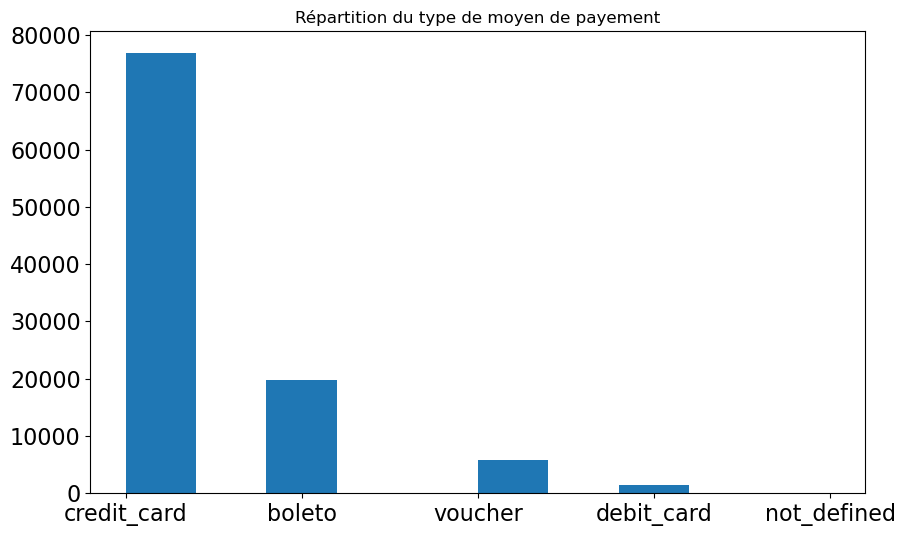

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 6))
hist1 = plt.hist(payments["payment_type"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Répartition du type de moyen de payement")
hist1

**credit card :** carte de crédit

**boleto :**  en espèce

**voucherbon :** d'échange ou coupon

**debit carte :** carte de débit

**not defined :** non defini


## 2.6 Les commentaires des clients

In [47]:
reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<IPython.core.display.Javascript object>

In [48]:
print(f"shape : {reviews.shape}")
print(f"le nombre de lignes est : {reviews.shape[0]}")
print(f"le nombre de colonnes est : {reviews.shape[1]}")

shape : (99224, 7)
le nombre de lignes est : 99224
le nombre de colonnes est : 7


<IPython.core.display.Javascript object>

**review_id :** identifiant du commentaire

**order_id :** identifiant de la commande

**review_score :** la note sur 5 attribuée par le client

**review_comment_title :** le titre du commentaire

**review_comment_message :** le commentaire

**review_creation_date :** la date de création du commentaire

**review_answer_timestamp :** la date dee réponse du commentaire

In [49]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


<IPython.core.display.Javascript object>

Nous pouvons observer que moins de la moitié des clients rédige un commentaire sur leur commande et parmi eux environ le quart donne un titre à leur commentaire. Néanmoins tous les clients donne une note de satisfaction pour leur commande. Ainsi il serait intéressant d'observer ces notes dans un histogramme.

(array([7.6795e+04, 0.0000e+00, 1.9784e+04, 0.0000e+00, 0.0000e+00,
        5.7750e+03, 0.0000e+00, 1.5290e+03, 0.0000e+00, 3.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

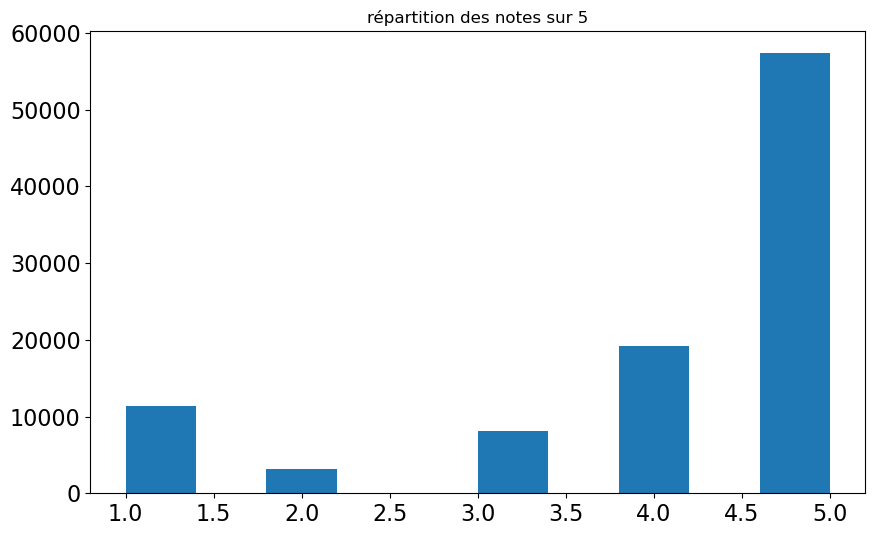

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(reviews["review_score"])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("répartition des notes sur 5")
hist1

## 2.7 Les produits

In [51]:
products = pd.read_csv(path + "olist_products_dataset.csv")  # produits achetés
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<IPython.core.display.Javascript object>

In [52]:
print(f"shape : {products.shape}")
print(f"le nombre de lignes est : {products.shape[0]}")
print(f"le nombre de colonnes est : {products.shape[1]}")

shape : (32951, 9)
le nombre de lignes est : 32951
le nombre de colonnes est : 9


<IPython.core.display.Javascript object>

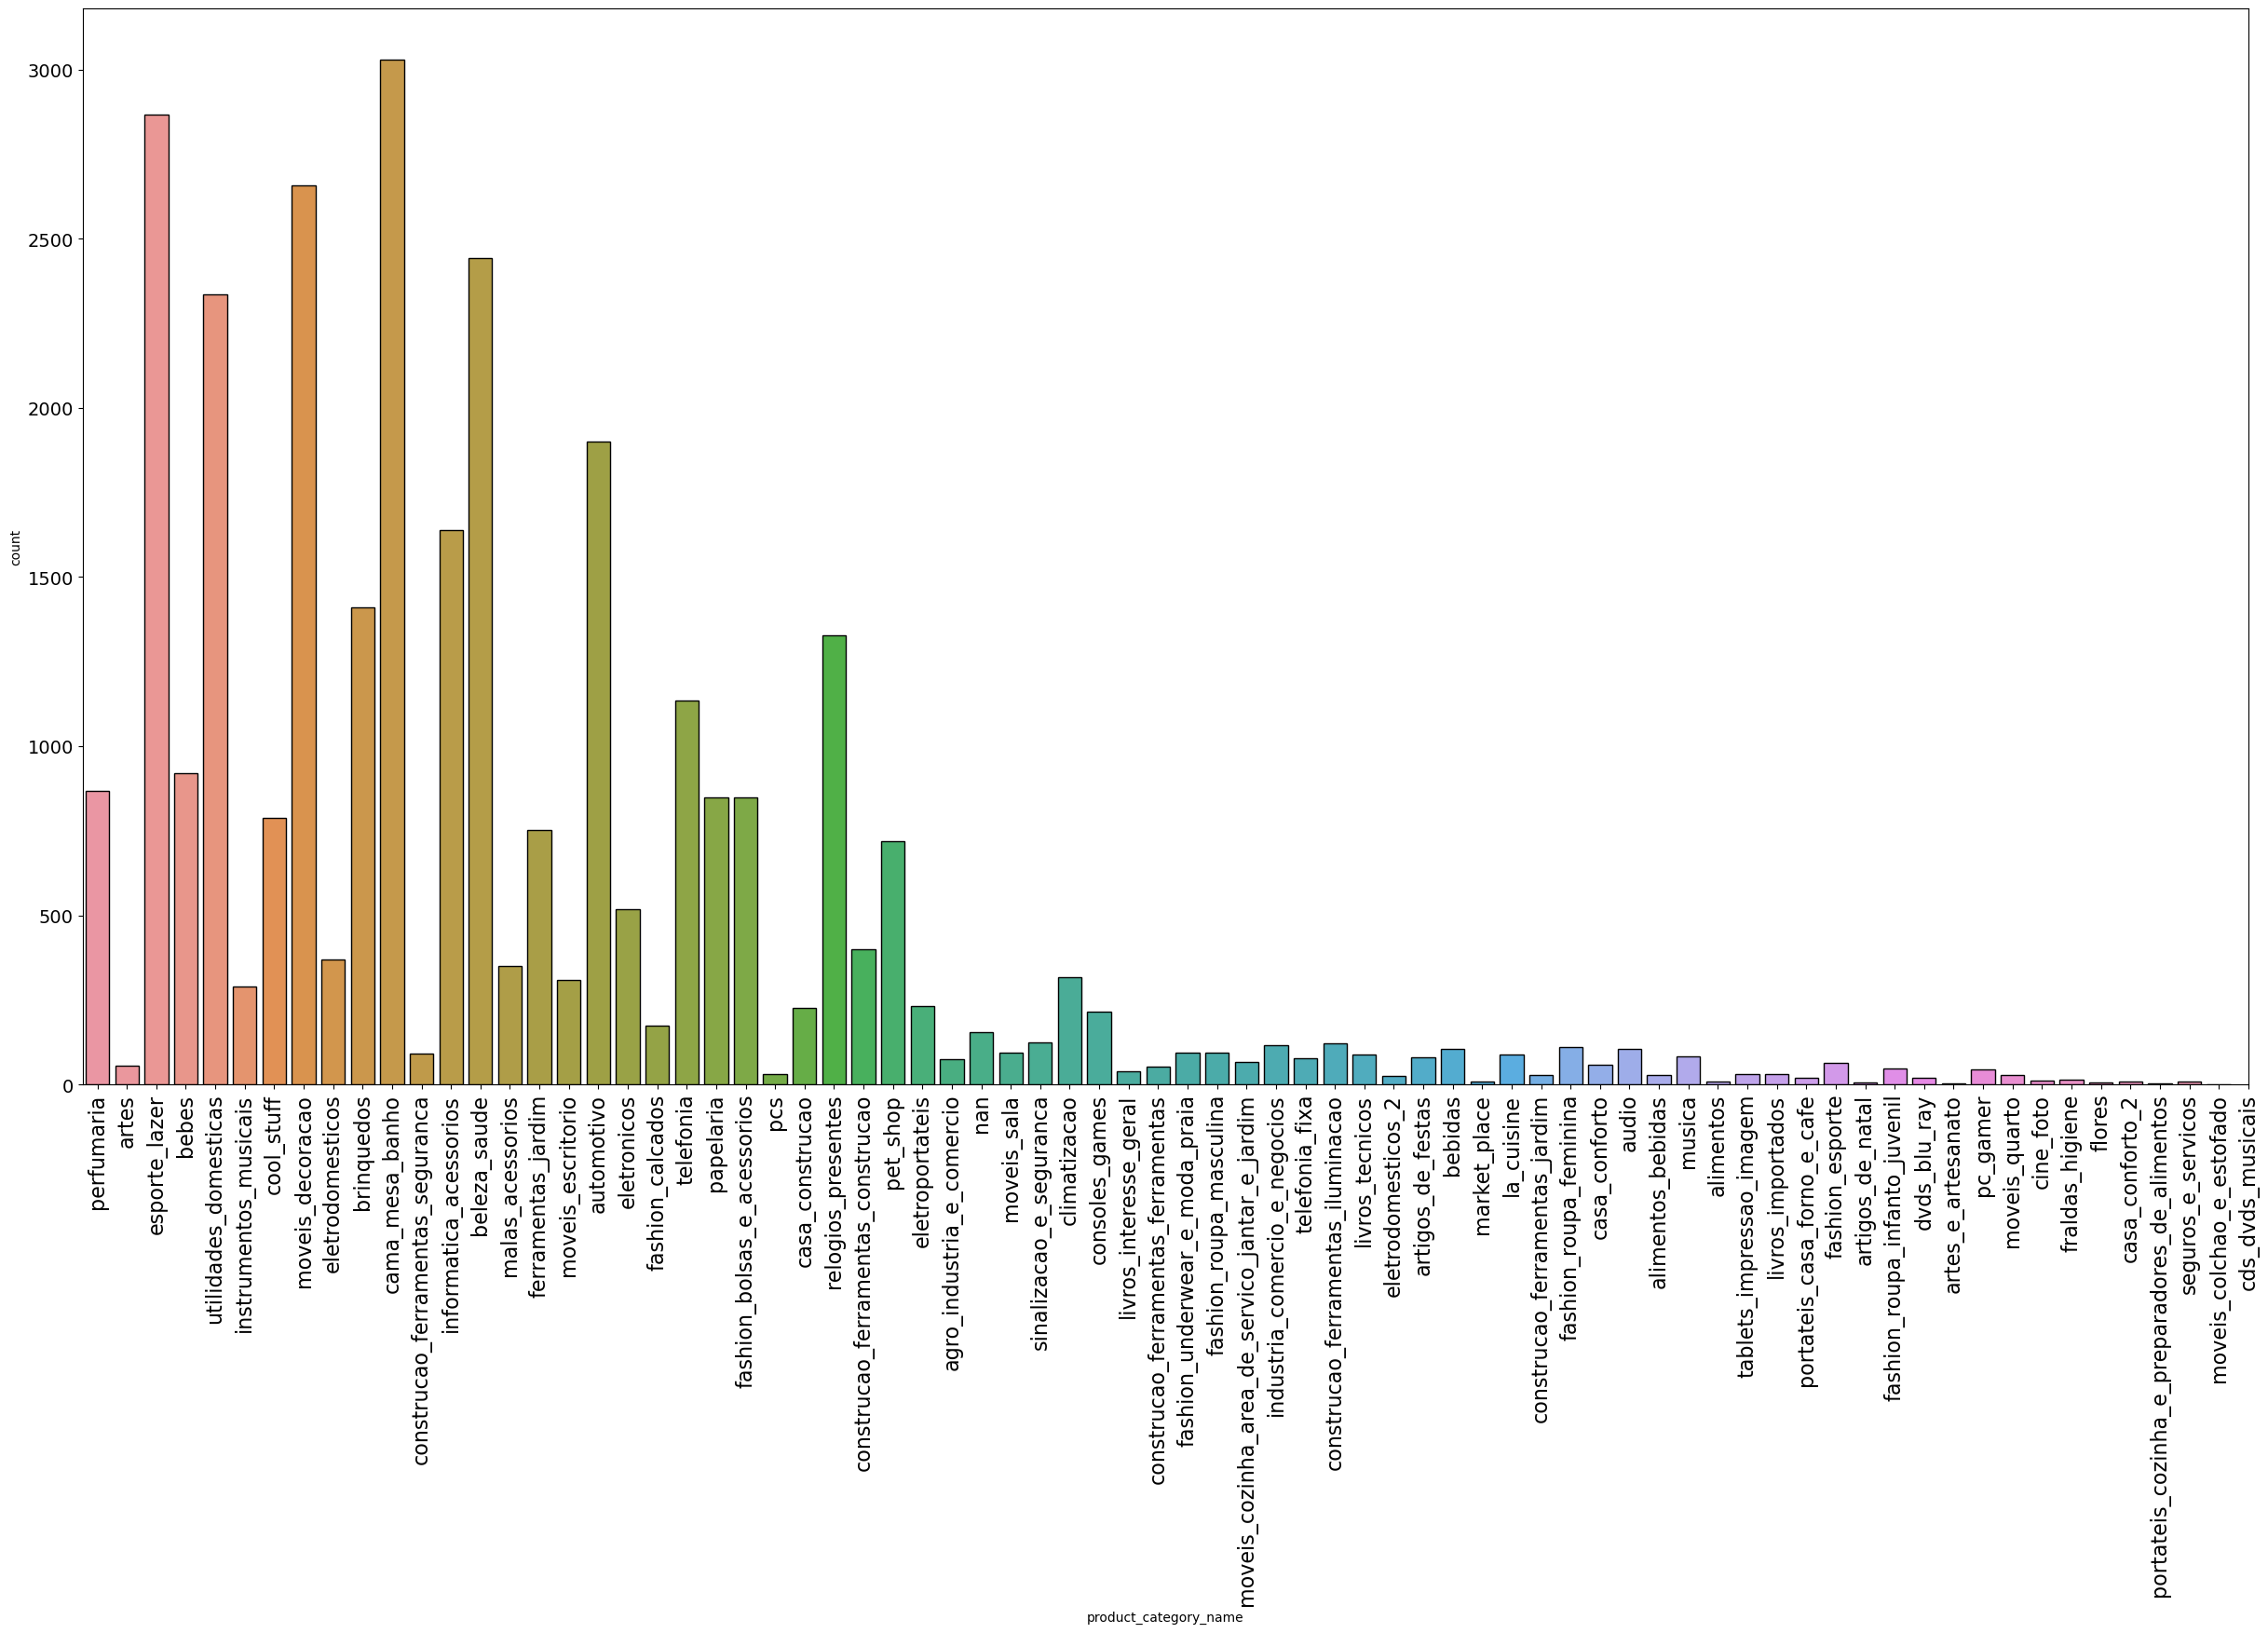

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(30, 15))

sns.countplot(data=products, x="product_category_name", edgecolor="black")

plt.xticks(
    range(0, products["product_category_name"].nunique() + 1),
    products["product_category_name"].unique(),
    rotation=90,
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

# plt.title(f"Les catégories produits les plus représentées\n",
# fontdict=font_title)
plt.show()

## 2.8 Les vendeurs

In [54]:
sellers = pd.read_csv(path + "olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<IPython.core.display.Javascript object>

In [55]:
print(f"shape : {sellers.shape}")
print(f"le nombre de lignes est : {sellers.shape[0]}")
print(f"le nombre de colonnes est : {sellers.shape[1]}")

shape : (3095, 4)
le nombre de lignes est : 3095
le nombre de colonnes est : 4


<IPython.core.display.Javascript object>

In [56]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


<IPython.core.display.Javascript object>

In [57]:
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

<IPython.core.display.Javascript object>

## 2.9 Les catégories de produits

In [58]:
category_name = pd.read_csv(path + "product_category_name_translation.csv")
category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<IPython.core.display.Javascript object>

In [59]:
print(f"shape : {category_name.shape}")
print(f"le nombre de lignes est : {category_name.shape[0]}")
print(f"le nombre de colonnes est : {category_name.shape[1]}")

shape : (71, 2)
le nombre de lignes est : 71
le nombre de colonnes est : 2


<IPython.core.display.Javascript object>

In [60]:
category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


<IPython.core.display.Javascript object>

Il n'y a aucune valeur nulle

In [61]:
category_name.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

<IPython.core.display.Javascript object>

Nous avons bien 71  catégories d'article différents